In [138]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

In [139]:
N_ = 9
n_ = 52
k_ = 11
SEGMENT = (0, 2)
a_ = SEGMENT[0]
b_ = SEGMENT[1]

def function_(tau):
    return (20 + 0.2 * N_)/(1 + (20 + 0.2 * N_) * (1 + 0.05 * (54 - n_)) * (tau - 1)**2)

In [140]:
@dataclass
class Point:
    x: int
    y: int

    def __str__(self) -> str:
        return f'(x: {self.x}, y: {self.y})'
    
    def __round__(self, ndigits=0):
        rounded_x = round(self.x, ndigits)
        rounded_y = round(self.y, ndigits)
        return Point(rounded_x, rounded_y)

In [141]:
def L(x: float, points: list[Point]) -> float:
    
    def l(i: int) -> float:
        mult: float = lambda arr : 1 if not arr else arr[0] * mult(arr[1:])
        return mult([(x - points[j].x)/(points[i].x - points[j].x) if i != j else 1 for j in range(len(points))])

    return sum([points[i].y * l(i) for i in range(len(points))])

In [142]:
def decorate_plot(ax, k, a, b):
    # Define font sizes
    SIZE_TICKS = 10

    # axis names
    ax.set_xlabel('x')

    k_ticks = k - (k % 10)
    h_ticks = (b - a) / k_ticks
    x_ticks = [a + i * h_ticks for i in range(k_ticks + 1)]
    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    # plt.legend(fontsize=10, loc='lower left')
    plt.legend(fontsize=10, loc=(-0.025, -0.3))

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

def buildBar(func, L, net_generator, a, b, k, name):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # # ref
    # x_values = np.linspace(0, b, 1000)
    # y_values = [func(x) for x in x_values]
    # ax.plot(x_values, y_values, color='green', linestyle='-', linewidth=1.5, label='$f(\\tau) \\text{ (эталон)}$')

    # 21
    k_pten = k + 10 - 1
    h_pten = (b - a) / k_pten

    x_values = [a + i * h_pten for i in range(k_pten + 1)]
    y_values = [func(x) for x in x_values]
    ax.plot(x_values, y_values, color='blue', linestyle='-', linewidth=1.5, label='$f(\\tau) \\text{ (равномерная сетка, 21 узел)}$')

    # 11
    data = net_generator(k, func, a, b)
    x_values = [point.x for point in data]
    y_values = [L(x, data) for x in x_values]
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5, label=name)

    # Call the decoration function
    decorate_plot(ax, k, a, b)

    # Save the figure
    # plt.savefig('histXpdf.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

$$ [0; 2] \qquad f(\tau) \qquad \text{равномерная сетка} \qquad \text{11 узлов} \qquad \text{интерполяционный полином Лагранжа} $$

In [ ]:
def Uniform_NET(k, func, a, b):
    h = (b - a) / (k - 1)
    
    data = []
    for i in range(k):
        x = a + i * h
        y = func(x)

        data.append(Point(x, y))
    return data

data_ = Uniform_NET(k_, function_, a_, b_)
for ind, point in enumerate(data_):
    print(f'{ind + 1}: {round(point, 3)}')

1: (x: 0.0, y: 0.873)
2: (x: 0.2, y: 1.334)
3: (x: 0.4, y: 2.263)
4: (x: 0.6, y: 4.507)
5: (x: 0.8, y: 11.127)
6: (x: 1.0, y: 21.8)
7: (x: 1.2, y: 11.127)
8: (x: 1.4, y: 4.507)
9: (x: 1.6, y: 2.263)
10: (x: 1.8, y: 1.334)
11: (x: 2.0, y: 0.873)


In [144]:
check = []
for point in data_:
    x = point.x
    y = point.y

    calculated_y = L(x, data_)

    check.append(round(y, 5) == round(calculated_y, 5))
print(all(check))

True


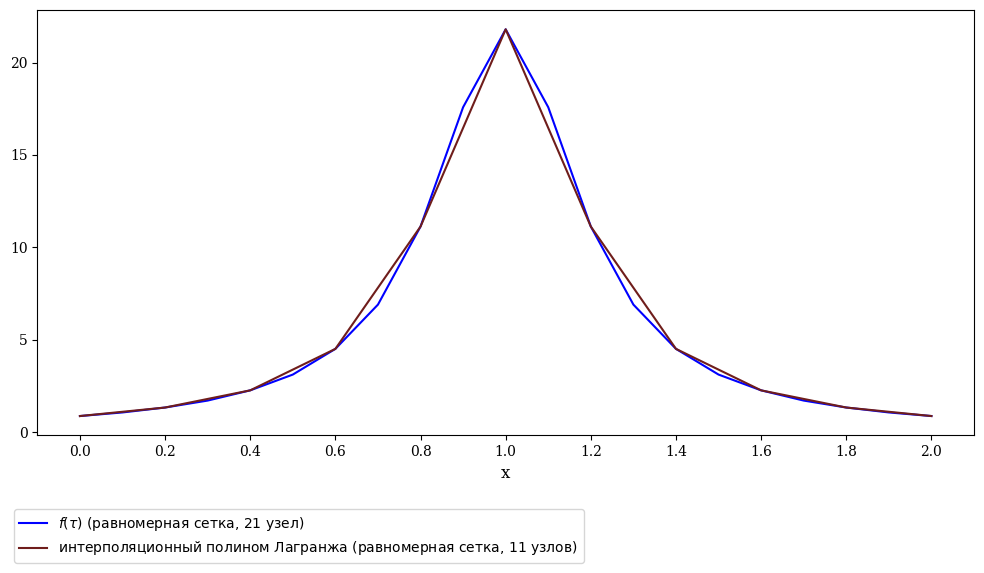

In [145]:
buildBar(func=function_, L=L, net_generator=Uniform_NET, a=a_, b=b_, k=k_, name='$\\text{интерполяционный полином Лагранжа (равномерная сетка, 11 узлов)}$')

$$ [0; 2] \qquad f(\tau) \qquad \text{чебышевская сетка} \qquad \text{11 узлов} \qquad \text{интерполяционный полином Лагранжа} $$

In [146]:
def Chebushev_NET(n, func, a, b):
    data = []
    for k in range(1, n + 1):
        x = 1/2 * (a + b) + 1/2 * (b - a) * np.cos((2*k - 1)/(2 * n) * np.pi)
        y = func(x)

        data.append(Point(x, y))
    return data[::-1]

data_ = Chebushev_NET(k_, function_, a_, b_)
for ind, point in enumerate(data_):
    print(f'{ind + 1}: {round(point, 3)}')

1: (x: 0.01, y: 0.89)
2: (x: 0.09, y: 1.046)
3: (x: 0.244, y: 1.483)
4: (x: 0.459, y: 2.722)
5: (x: 0.718, y: 7.509)
6: (x: 1.0, y: 21.8)
7: (x: 1.282, y: 7.509)
8: (x: 1.541, y: 2.722)
9: (x: 1.756, y: 1.483)
10: (x: 1.91, y: 1.046)
11: (x: 1.99, y: 0.89)


In [147]:
check = []
for point in data_:
    x = point.x
    y = point.y

    calculated_y = L(x, data_)

    check.append(round(y, 5) == round(calculated_y, 5))
print(all(check))

True


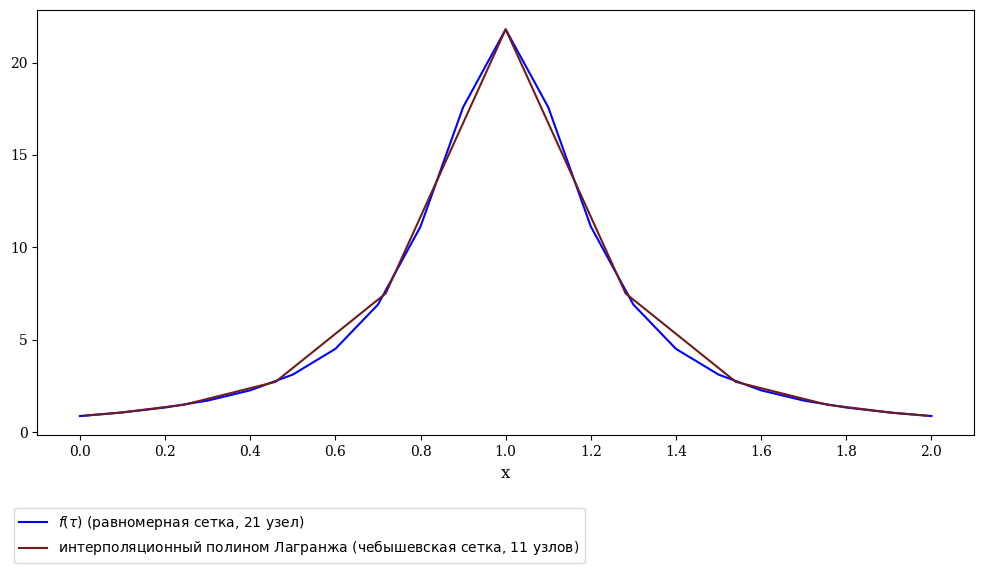

In [148]:
buildBar(func=function_, L=L, net_generator=Chebushev_NET, a=a_, b=b_, k=k_, name='$\\text{интерполяционный полином Лагранжа (чебышевская сетка, 11 узлов)}$')

$$ \text{Extra} $$

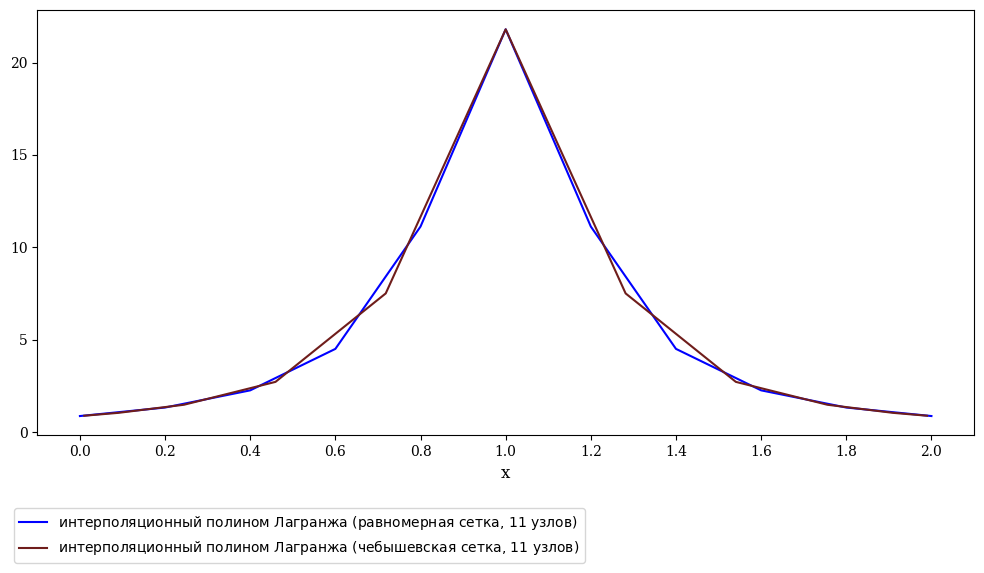

In [149]:
def buildBar(func, L, a, b, k):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # # ref
    # x_values = np.linspace(0, b, 1000)
    # y_values = [func(x) for x in x_values]
    # ax.plot(x_values, y_values, color='green', linestyle='-', linewidth=1.5, label='$f(\\tau) \\text{ (эталон)}$')

    # uniform
    data = Uniform_NET(k, func, a, b)
    x_values = [point.x for point in data]
    y_values = [L(x, data) for x in x_values]
    ax.plot(x_values, y_values, color='blue', linestyle='-', linewidth=1.5, label='$\\text{интерполяционный полином Лагранжа (равномерная сетка, 11 узлов)}$')

    # cheushev
    data = Chebushev_NET(k, func, a, b)
    x_values = [point.x for point in data]
    y_values = [L(x, data) for x in x_values]
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5, label='$\\text{интерполяционный полином Лагранжа (чебышевская сетка, 11 узлов)}$')

    # Call the decoration function
    decorate_plot(ax, k, a, b)

    # Save the figure
    # plt.savefig('histXpdf.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

buildBar(func=function_, L=L, a=a_, b=b_, k=k_)